In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

## Load the data



In [2]:
data_listings = pd.read_csv('Airbnb Data/Listings.csv')
data_reviews =  pd.read_csv('Airbnb Data/Reviews.csv')

/Users/borisescalanteramirez/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data_listings

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf prÃ¨s du tram T3a Porte Didot,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,7,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,6,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,3,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
data_reviews

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859
...,...,...,...,...
5373138,47779342,726766332,2021-01-25,283094516
5373139,47823964,727963021,2021-01-31,76411977
5373140,47896175,728548625,2021-02-02,71370946
5373141,47900451,727399287,2021-01-29,109011160


## Performing EDA

In [5]:
missing_data = data_listings.isna().sum()/len(data_listings)*100
missing_data[missing_data!=0]

name                            0.061849
host_since                      0.058989
host_location                   0.300309
host_response_time             46.040928
host_response_rate             46.040928
host_acceptance_rate           40.429799
host_is_superhost               0.058989
host_total_listings_count       0.058989
host_has_profile_pic            0.058989
host_identity_verified          0.058989
district                       86.767818
bedrooms                       10.523324
review_scores_rating           32.678255
review_scores_accuracy         32.788368
review_scores_cleanliness      32.771208
review_scores_checkin          32.809104
review_scores_communication    32.779073
review_scores_location         32.810534
review_scores_value            32.814109
dtype: float64

In [6]:
data_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

### Counts per city

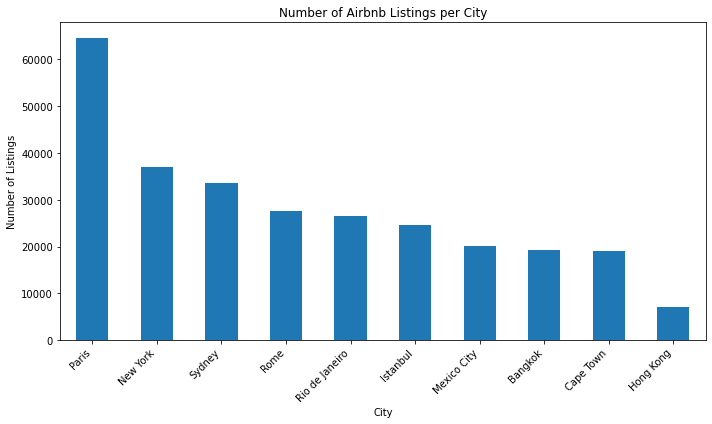

In [7]:
data_listings['city'] = data_listings['city'].str.split(',').str[-1].str.strip()
data_listings.dropna(subset=['city'], inplace=True)
listings_per_country = data_listings['city'].value_counts()


plt.figure(figsize=(10, 6))
listings_per_country.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings per City')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Percentage of superhosts per city by place they rent

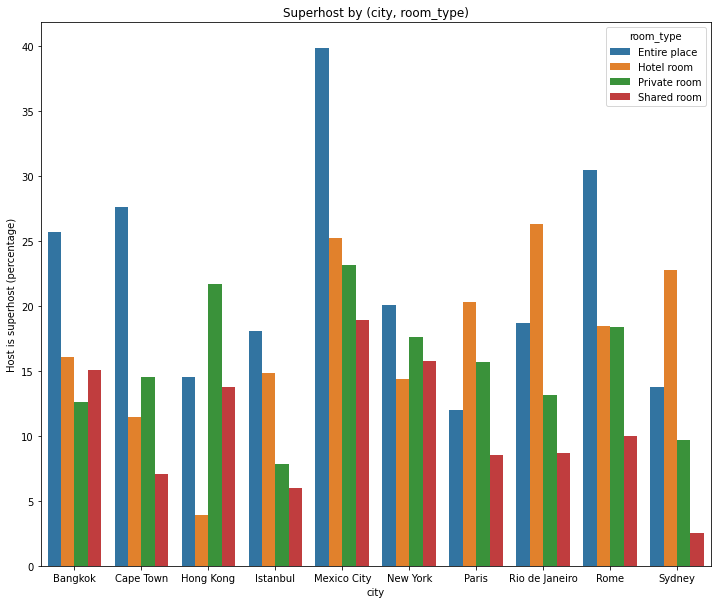

In [8]:
plt.figure(figsize=(12, 10))
result = data_listings.groupby(["city", "room_type"]).apply(lambda group: (group["host_is_superhost"] == "t").mean() * 100.0)

result = result.reset_index(name="Host is superhost (percentage)")
sns.barplot(x="city", y="Host is superhost (percentage)", hue="room_type", data=result).set_title("Superhost by (city, room_type)")
plt.savefig('superhosts_city.jpg')
plt.show()

# result.head(100)

### Visualising only Rome

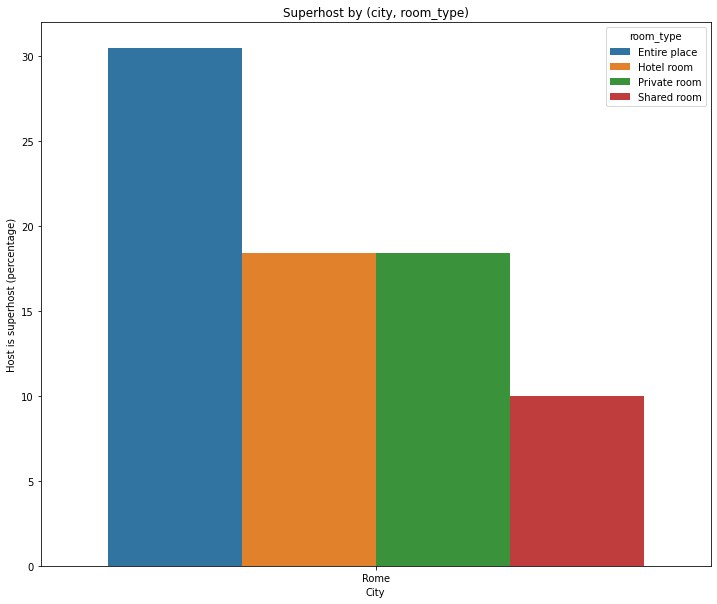

In [9]:
romes_data = data_listings[data_listings["city"] == "Rome"]

result = romes_data.groupby(["city", "room_type"]).apply(lambda group: (group["host_is_superhost"] == "t").mean() * 100.0)
result = result.reset_index(name="Host is superhost (percentage)")

plt.figure(figsize=(12, 10))
sns.barplot(x="city", y="Host is superhost (percentage)", hue="room_type", data=result)
plt.title("Superhost by (city, room_type)")
plt.xlabel("City")
plt.ylabel("Host is superhost (percentage)")
plt.show()

### Boxplot of prices across cities

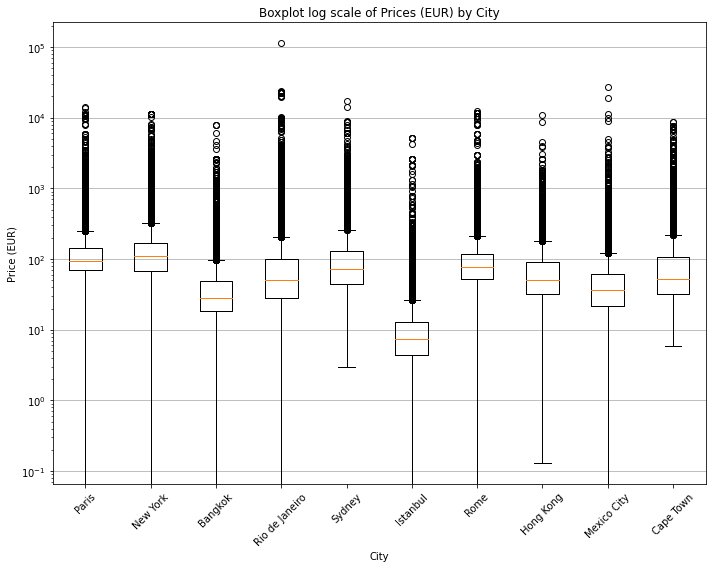

In [10]:
grouped_data = data_listings.groupby('city')
exchange_rates = {
    'New York': 1.12,    # USD to EUR
    'Bangkok': 0.026,      # GBP to EUR
    'Paris': 1.18,       # EUR to EUR (no conversion needed)
    'Rome': 1.18,     # JPY to EUR
    'Mexico City': 0.055,
    'Sydney':  0.6,
    'Rio de Janeiro': 0.18,
    'Istanbul': 0.029 ,
    'Cape Town': 0.049 ,
    'Hong Kong' :0.13
}
data_listings['price_eur'] = data_listings.apply(lambda row: row['price'] * exchange_rates.get(row['city'], 1.0), axis=1)

cities = data_listings['city'].unique()

plt.figure(figsize=(10, 8))
plt.boxplot([data_listings[data_listings['city'] == city]['price_eur'] for city in cities], labels=cities)
plt.xlabel('City')
plt.ylabel('Price (EUR)')
plt.title('Boxplot log scale of Prices (EUR) by City')
plt.xticks(rotation=45)
plt.yscale('log')
# plt.ylim(0, 30000)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Analysis
### Correlation between numerical variables

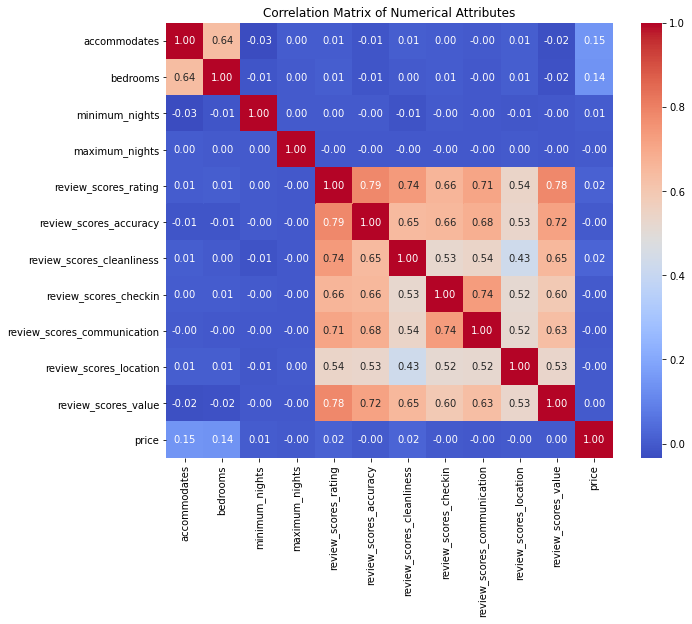

In [11]:
df = data_listings
numerical_attributes = ['accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights','review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
numerical_df = df[numerical_attributes + ['price']]

correlation_matrix = numerical_df.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

### Removing scores attributes and plotting correlations

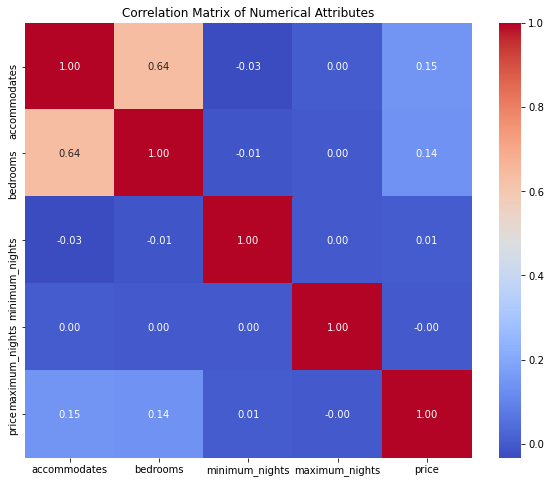

In [12]:
df = data_listings
numerical_attributes = ['accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights']
numerical_df = df[numerical_attributes + ['price']]

correlation_matrix = numerical_df.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Attributes')
plt.show()

In [13]:

threshold = 3 * data_listings['price'].std()

# Remove outliers for each number of bedrooms
filtered_df = data_listings.groupby('bedrooms').apply(lambda x: x[x['price'] < x['price'].mean() + threshold])
filtered_df = filtered_df.reset_index(drop=True)

mean_prices_without_outliers = filtered_df.groupby('bedrooms')['price'].mean()
print("Mean Prices without Outliers:")
print(mean_prices_without_outliers.head())

Mean Prices without Outliers:
bedrooms
1.0     331.660660
2.0     602.149414
3.0    1030.133051
4.0    1879.517660
5.0    2526.369278
Name: price, dtype: float64


### Analysis on amenities

In [14]:
data_amenities = pd.merge(data_reviews, data_listings, on='listing_id', how='inner')

data_amenities['amenities'] = data_amenities['amenities'].apply(eval)
data_amenities['date'] = pd.to_datetime(data_amenities['date'])
data_amenities['month'] = data_amenities['date'].dt.month

data_amenities['season'] = data_amenities['month'].apply(lambda x: 'winter' if x in [12, 1, 2] else 'summer')

grouped_by_season = data_amenities.groupby('season')

amenities_popularity = {}

for season, group in grouped_by_season:
    amenities_flat = [item for sublist in group['amenities'] for item in sublist]
    amenity_counts = pd.Series(amenities_flat).value_counts()
    amenities_popularity[season] = amenity_counts

for season, popularity in amenities_popularity.items():
    print(f"Season: {season.capitalize()}")
    print(popularity.head(15))
    print()

Season: Summer
Wifi                       3927067
Essentials                 3776801
Hair dryer                 3498065
Long term stays allowed    3489517
Hangers                    3447948
Kitchen                    3414682
Hot water                  3310880
Iron                       3264742
TV                         3229725
Heating                    3174899
Shampoo                    3019334
Dedicated workspace        3018730
Dishes and silverware      2935154
Refrigerator               2933387
Smoke alarm                2680685
dtype: int64

Season: Winter
Wifi                       1312947
Essentials                 1269177
Long term stays allowed    1178275
Hangers                    1166391
Hair dryer                 1149433
Kitchen                    1144714
Hot water                  1118050
Iron                       1097167
TV                         1096589
Dedicated workspace        1019250
Dishes and silverware       998451
Shampoo                     997145
Refrigerato

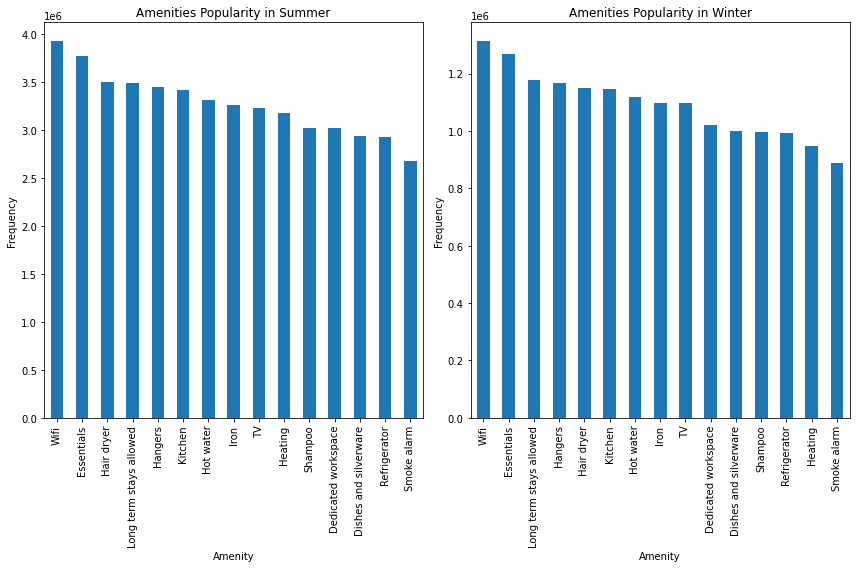

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 8))


for i, (season, popularity) in enumerate(amenities_popularity.items()):
    ax = axs[i]
    
    popularity.head(15).plot(kind='bar', ax=ax)
    
    ax.set_title(f'Amenities Popularity in {season.capitalize()}')
    ax.set_xlabel('Amenity')
    ax.set_ylabel('Frequency')

plt.tight_layout()

plt.show()

### Merging datasets to build models

In [16]:
merged_df = pd.merge(data_listings, data_reviews, on='listing_id', how='inner')
merged_df

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,price_eur,review_id,date,reviewer_id
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,62.54,173279221,2017-07-23,3501898
1,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,62.54,172657766,2017-07-21,74346703
2,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,141.60,20792760,2014-10-05,21583508
3,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,141.60,32282670,2015-05-16,32285553
4,3705183,39 mÂ² Paris (Sacre CÅ“ur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,141.60,45645391,2015-09-04,34310199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5373138,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,59.00,532395580,2019-09-19,10347403
5373139,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,59.00,553159713,2019-10-23,197011717
5373140,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,123.90,556350613,2019-10-29,102836346
5373141,40219504,Cosy apartment with view on Canal St Martin,6955618,2013-06-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,10.0,10.0,10.0,10.0,10.0,f,82.60,597833586,2020-01-26,21707358


Reducing the size of our dataset since it was very large and computations were taking a while

In [17]:
fraction_to_keep = 0.7

smaller_data = merged_df.sample(frac=fraction_to_keep, random_state=42)
# len(smaller_data)

### Model to predict prices

In [20]:
future_years = [[2024], [2025], [2026], [2027]] 
future_predictions = {}
five_bedrooms = smaller_data[smaller_data['bedrooms'] <= 5]
five_bedrooms['date'] = pd.to_datetime(five_bedrooms['date'])
five_bedrooms['year'] = five_bedrooms['date'].dt.year

for bedrooms, group in five_bedrooms.groupby('bedrooms'):
    average_prices = group.groupby('year')['price'].mean()

    X = average_prices.index.values.reshape(-1, 1)
    y = average_prices.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {bedrooms} bedrooms:", mse)

    future_predictions[bedrooms] = model.predict(future_years)

for bedrooms, predictions in future_predictions.items():
    print(f"Future Predictions for {bedrooms} bedrooms:", predictions)
    

<ipython-input-20-b167ebbd17bd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_bedrooms['date'] = pd.to_datetime(five_bedrooms['date'])
<ipython-input-20-b167ebbd17bd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  five_bedrooms['year'] = five_bedrooms['date'].dt.year


Mean Squared Error for 1.0 bedrooms: 18128.976895021708
Mean Squared Error for 2.0 bedrooms: 36.59541012960801
Mean Squared Error for 3.0 bedrooms: 19503.522598082298
Mean Squared Error for 4.0 bedrooms: 93072.01430919115
Mean Squared Error for 5.0 bedrooms: 54683.84817551259
Future Predictions for 1.0 bedrooms: [320.50680035 323.66499692 326.8231935  329.98139008]
Future Predictions for 2.0 bedrooms: [726.72624453 763.76970298 800.81316144 837.85661989]
Future Predictions for 3.0 bedrooms: [1151.14807235 1206.02977439 1260.91147643 1315.79317846]
Future Predictions for 4.0 bedrooms: [2122.36574345 2222.47294459 2322.58014573 2422.68734687]
Future Predictions for 5.0 bedrooms: [2697.15123694 2806.9019304  2916.65262385 3026.4033173 ]


Seeing that our errros were very big and inconsistent we decided to do a similar model on prices of only just a city and taking neighbourhoods, latitued, longitude and prices of the listings instead of years

### Building clustering models for a specific city

In [21]:
# Method to perform data transformation by joinig tables
def join_city_datasets(city):
    
    data = df[df['city'] == city]
    properties_filtered = data[['listing_id', 'neighbourhood', 'price', 'latitude', 'longitude', 'host_since']]
    
    properties_filtered.dropna(subset=['neighbourhood'], inplace=True)
    
    plot_rome_prices(properties_filtered)
    plot_rome_prices_log(properties_filtered)
    plot_rome_earnings(properties_filtered)
    plot_mean_bedroom(city)
    
    merged_left_df = pd.merge(properties_filtered, data_reviews, on='listing_id', how='outer')
    merged_left_df['date'] = pd.to_datetime(merged_left_df['date'])
    merged_left_df['year'] = merged_left_df['date'].dt.year
    merged_left_df['month'] = merged_left_df['date'].dt.month
    
    grouped_df = merged_left_df.groupby(['listing_id', 'year', 'month']).size().reset_index(name='count')
    left_join_data =  pd.merge(properties_filtered, grouped_df, on='listing_id', how='left')
    grouped_df['month_rentability'] = grouped_df['count'] * merged_left_df['price']

    yearly_rentability = grouped_df.groupby(['year', 'month'])['month_rentability'].sum().reset_index()
    plot_year_rent(yearly_rentability)
    

    left_join_yearly = pd.merge(properties_filtered, grouped_df, on='listing_id', how='left')
    neighbourhood_avg_price = left_join_yearly.groupby('neighbourhood')['price'].mean().reset_index()

    neighbourhood_avg_price.rename(columns={'price': 'neighbourhood_average'}, inplace=True)

    merged_left_df = pd.merge(left_join_yearly, neighbourhood_avg_price, on='neighbourhood', how='left')
    
    
    merged_left_df.dropna(subset=['neighbourhood'], inplace=True)
    merged_left_df.dropna(subset=['count'], inplace=True)
    merged_left_df.dropna(subset=['year'], inplace=True)
    merged_left_df.dropna(subset=['month'], inplace=True)
    
    return merged_left_df


# Linear model to predict prices based on neighobourhood
def linearModelNeighbourhoods(merged_left_df):
    
    X_1 = merged_left_df[['year', 'month','neighbourhood']]  
    y_1 = merged_left_df['count']  

    X_1 = pd.get_dummies(X_1, columns=['neighbourhood'], drop_first=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)
    X_train.fillna(X_train.mean(), inplace=True)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error of Linear Regression:", mse)
    
    return merged_left_df

    # Model to predict prices using KNN
def predict_rentability_KNN(merged_left_df):
    merged_left_df.dropna(subset=['latitude'], inplace=True)
    merged_left_df.dropna(subset=['longitude'], inplace=True)
    data_for_clustering = merged_left_df[['latitude', 'longitude']]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_for_clustering)
    
    k = 100 
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    merged_left_df['areas'] = cluster_labels
    X_2 = merged_left_df[['year', 'month','areas']]
    y_2 = merged_left_df['count']  

    merged_left_df.dropna(subset=['areas'], inplace=True)
    merged_left_df.dropna(subset=['count'], inplace=True)
    merged_left_df.dropna(subset=['year'], inplace=True)
    merged_left_df.dropna(subset=['month'], inplace=True)

    X_2 = pd.get_dummies(X_2, columns=['areas'], drop_first=True)
    X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    
#     plot_clustered_areas(merged_left_df)
#     plot_rentability_clusters(merged_left_df)
#     silhouette(scaled_data, cluster_labels)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error of KNN:", mse)
    
# Plotting methods 
def plot_year_rent(yearly_rentability):
    plt.figure(figsize=(10, 6))
    for year in yearly_rentability['year'].unique():
        year_data = yearly_rentability[yearly_rentability['year'] == year]
        plt.plot(year_data['month'], year_data['month_rentability'], label=year)

    plt.xlabel('Month')
    plt.ylabel('Month Rentability')
    plt.title('Month Rentability by Month and Year')
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()

def plot_mean_bedroom(city):
    data_rome = data_listings[data_listings['city'] == city]
    
    threshold = 3 * data_rome['price'].std()
    # Remove outliers for each number of bedrooms
    filtered_df = data_rome.groupby('bedrooms').apply(lambda x: x[x['price'] < x['price'].mean() + threshold])
    filtered_df = filtered_df.reset_index(drop=True)

    filtered_df = filtered_df[filtered_df['bedrooms'] <= 5]

    mean_prices_without_outliers = filtered_df.groupby('bedrooms')['price'].mean()

    plt.figure(figsize=(10, 6))
    plt.bar(mean_prices_without_outliers.index, mean_prices_without_outliers.values)
    plt.xlabel('Number of Bedrooms')
    plt.ylabel('Mean Price')
    plt.title('Mean Price by Number of Bedrooms without Outliers (up to 5 bedrooms)')
    plt.grid(True)
    plt.show()

def plot_rome_prices(properties_filtered):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='neighbourhood', y='price', data=properties_filtered)
    plt.title('Prices Distribution by Neighbourhood')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Price')
    plt.xticks(rotation=45, ha='right')
#     plt.yscale('log')
#     plt.savefig('boxplot_rome_prices.png')
    plt.show()
    
def plot_rome_prices_log(properties_filtered):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='neighbourhood', y='price', data=properties_filtered, color= 'blue')
    plt.title('Prices Distribution by Neighbourhood')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Price')
    plt.yscale('log')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
#     plt.savefig('boxplot_rome_prices_log.png')
    plt.show()
    
def plot_rome_earnings(properties_filtered):
    # Calculate earnings as the difference between maximum and minimum prices for each neighborhood
    earnings = properties_filtered.groupby('neighbourhood')['price'].apply(lambda x: x.max() - x.min()).reset_index(name='earnings')

    plt.figure(figsize=(12, 8))
    sns.barplot(x='neighbourhood', y='earnings', data=earnings, color='orange')
    plt.title('Earnings by Neighbourhood Through Years')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Earnings')
#     plt.yscale('log')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.grid(axis='y')
    plt.tight_layout()
#     plt.savefig('barplot_rome_earnings_log.png')
    plt.show()



<ipython-input-21-08b8dd994732>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  properties_filtered.dropna(subset=['neighbourhood'], inplace=True)


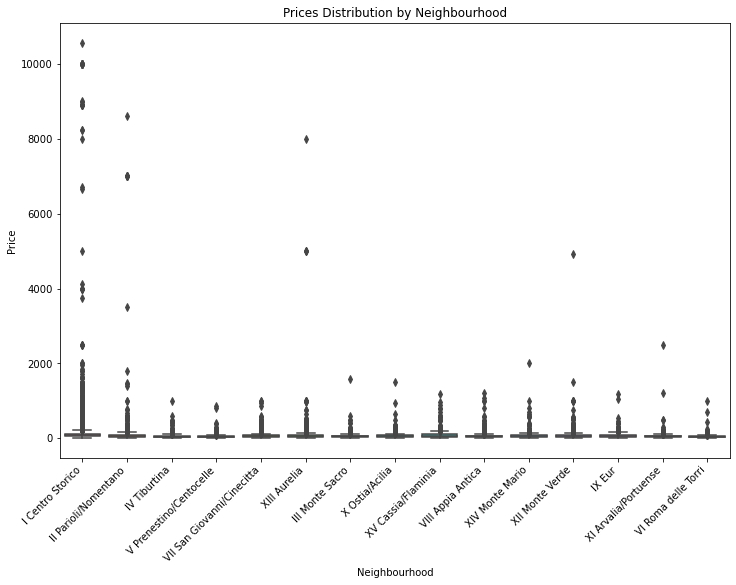

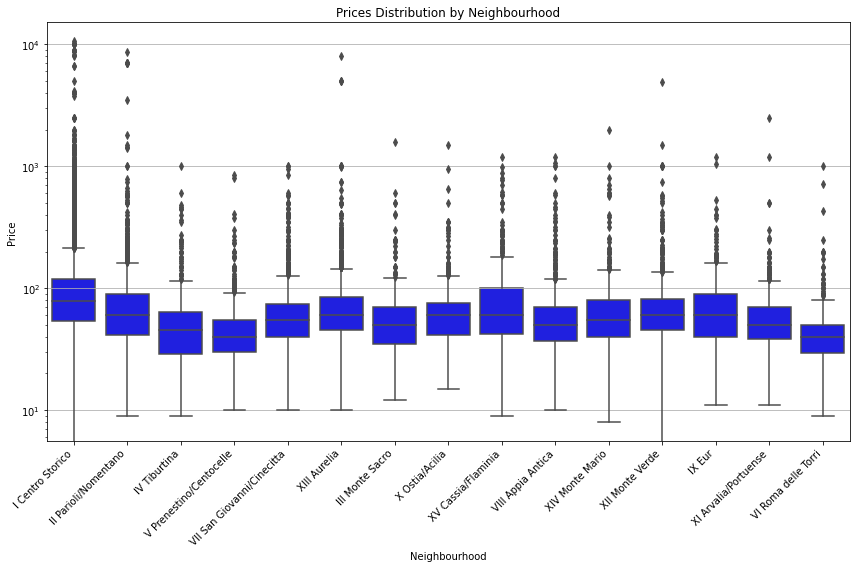

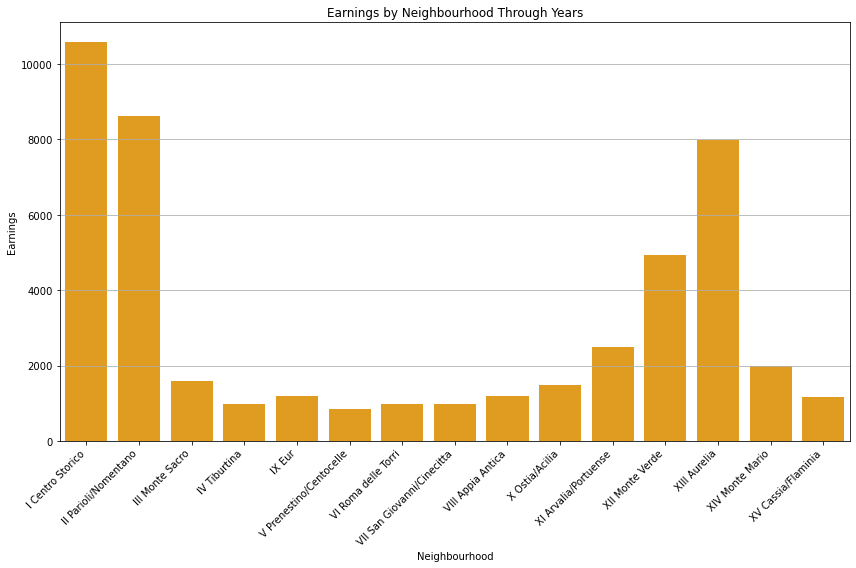

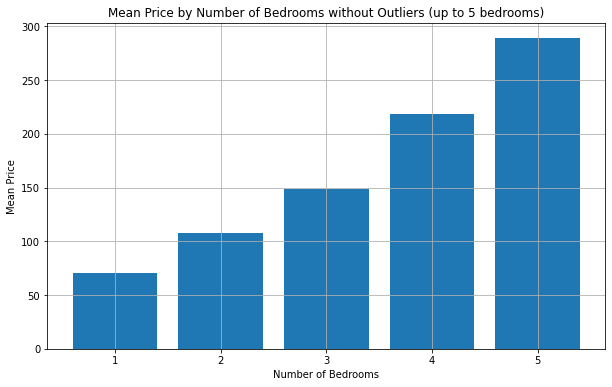

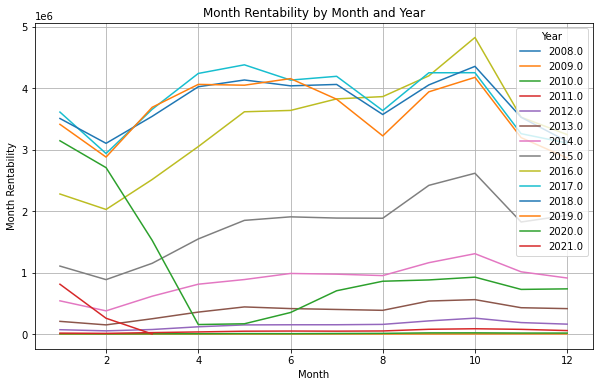

In [22]:
dataframe = join_city_datasets('Rome')

In [23]:
linearModelNeighbourhoods(dataframe)

Mean Squared Error of Linear Regression: 4.612642241954894


/Users/borisescalanteramirez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,listing_id,neighbourhood,price,latitude,longitude,host_since,year,month,count,month_rentability,neighbourhood_average
0,5335850,I Centro Storico,180,41.91384,12.46935,2015-02-12,2015.0,5.0,1.0,58.0,97.954969
1,10669776,II Parioli/Nomentano,51,41.89415,12.51701,2016-01-18,2016.0,3.0,4.0,116.0,74.361737
2,10669776,II Parioli/Nomentano,51,41.89415,12.51701,2016-01-18,2016.0,4.0,4.0,116.0,74.361737
3,10669776,II Parioli/Nomentano,51,41.89415,12.51701,2016-01-18,2016.0,5.0,3.0,87.0,74.361737
4,10669776,II Parioli/Nomentano,51,41.89415,12.51701,2016-01-18,2016.0,6.0,4.0,116.0,74.361737
...,...,...,...,...,...,...,...,...,...,...,...
376177,9242022,VII San Giovanni/Cinecitta,62,41.87131,12.51427,2015-03-28,2016.0,4.0,3.0,417.0,62.233959
376178,9242022,VII San Giovanni/Cinecitta,62,41.87131,12.51427,2015-03-28,2016.0,6.0,1.0,139.0,62.233959
376179,9242022,VII San Giovanni/Cinecitta,62,41.87131,12.51427,2015-03-28,2016.0,7.0,3.0,417.0,62.233959
376180,9242022,VII San Giovanni/Cinecitta,62,41.87131,12.51427,2015-03-28,2017.0,6.0,1.0,139.0,62.233959


In [24]:
predict_rentability_KNN(dataframe)

Mean Squared Error of KNN: 4.536118758775376


### Ethical Considerations

The dataset is made publicly avialable by Airbnb. Inside the dataset there is no sensible data about users that post listings, or users that rent places. The only data availabel about them are their user id's.

However when performing EDA on the dataset we noticed that we were able to gain the exact location of where properties are located since we have access to the latitude and longitude of the properties per city. Moreover, we also noticed that through data transformation and joining dataframes we were able to calcualte the average profit of every single property listed since whe had access to the reviews given to them and the price users paid across 2008 to 2021.

This data although it is not explicitly shown can be extracted by using the adequate data techniques and can be considered sensible since we can basically get access to the incom of every listing inside the dataset. Nevertheless, users agreed to term and conditions imposed by Airbnb and allowed their data to be published and used by the platform.